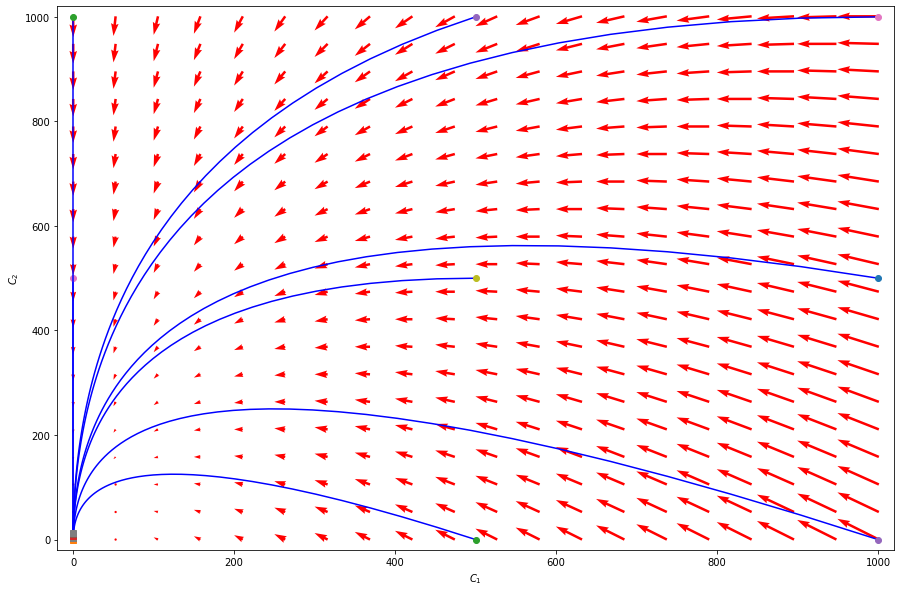

In [1]:
#Paqueterias
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#Constantes
b1 = 0.05 
b2 = 0.05
b3 = 0.05

tf = 100
stepx = 500
stepy = 500
maxx = 1001
maxy = 1001

def odes(x, t=0):

  C1 = x[0]
  C2 = x[1]

  dC1dt = - (b1 + b2) * C1
  dC2dt = (b2 * C1) - (b3 * C2)

  return [dC1dt, dC2dt]

y1 = np.linspace(0, maxx, 20)
y2 = np.linspace(0, maxy, 20)
Y1, Y2 = np.meshgrid(y1, y2) 
NI, NJ = Y1.shape 

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape) #regresa matriz del mismo tamaño llena de ceros

#Rellena la matriz vacía con los puntos finales de cada flecha
for i in range(NI):
    for j in range(NJ):
        u[i,j] = odes([Y1[i, j], Y2[i, j]])[0]
        v[i,j] = odes([Y1[i, j], Y2[i, j]])[1]

#Impresion de flechas
plt.figure(figsize=(15,10))     
plt.quiver(Y1, Y2, u, v, color='r')
plt.xlabel('$C_1$')
plt.ylabel('$C_2$')
plt.xlim([-20, 1020])
plt.ylim([-20, 1020])
plt.savefig('phase-portrait.png')

#Cálculo de trayectorias
for iniy in range(0, maxy, stepy):
  for inix in range(0, maxx, stepx):
    tspan = np.linspace(0, tf, 100)
    y0 = [inix, iniy]
    ys = odeint(odes, y0, tspan)

    #Impresión de trayectorias
    plt.plot(ys[:,0], ys[:,1], 'b-') # path
    plt.plot([ys[0,0]], [ys[0,1]], 'o') # start
    plt.plot([ys[-1,0]], [ys[-1,1]], 's') # end
    

plt.savefig('phase-portrait-2.png')
plt.show()